In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
import numpy as np
import matrix_dev
import matplotlib.pyplot as plt
import _pickle
import gensim
import gensim.corpora as corpora
import os
from pprint import pprint
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
import spacy
import pandas as pd
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
from lda_implementation import lda_model

In [3]:
lda = lda_model()

/Users/nantanick/anaconda/envs/nlu/lib/python3.6/site-packages/msgpack_numpy.py:84: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
/Users/nantanick/anaconda/envs/nlu/lib/python3.6/site-packages/msgpack_numpy.py:88: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr))[0]
/Users/nantanick/anaconda/envs/nlu/lib/python3.6/site-packages/msgpack_numpy.py:84: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
/Users/nantanick/anaconda/envs/nlu/lib/python3.6/site-packages/msgpack_numpy.py:84: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dt

In [4]:
lda.load_data('raw_docs', 'dev')

loading pickles


/Users/nantanick/anaconda/envs/nlu/lib/python3.6/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [5]:
#lda.lda_mallet_model()
best_model, coherence_values = lda.best_model_search()


Num_topics =  30  corresponding coherence value:  0.464285973683647
Num_topics =  80  corresponding coherence value:  0.5386608241322357
Num_topics =  130  corresponding coherence value:  0.5938606702302477
Num_topics =  180  corresponding coherence value:  0.6230366307161699
Num_topics =  230  corresponding coherence value:  0.6561172918401308
Num_topics =  280  corresponding coherence value:  0.6705458510369121
Num_topics =  330  corresponding coherence value:  0.6773575279453754
Num_topics =  380  corresponding coherence value:  0.6890472055507807
Num_topics =  430  corresponding coherence value:  0.6923725609599596
Num_topics =  480  corresponding coherence value:  0.6954030757557658
representative docs
topic distribution


In [6]:
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(best_model)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, lda.corpus, lda.id2word)

In [7]:
vis

PreparedData(topic_coordinates=           Freq  cluster  topics             x         y
topic                                                   
437    0.527177        1       1 -1.299232e-04  0.000021
39     0.446588        1       2  4.756124e-05  0.000034
226    0.403500        1       3  7.383882e-05 -0.000063
62     0.357214        1       4 -6.763075e-05 -0.000091
315    0.337976        1       5 -3.346342e-07  0.000045
105    0.330042        1       6  8.954869e-05 -0.000034
61     0.321376        1       7  8.934973e-06  0.000218
178    0.312533        1       8 -9.531225e-05 -0.000047
133    0.306372        1       9 -3.127570e-05  0.000075
228    0.302528        1      10  2.788569e-06  0.000073
431    0.300156        1      11 -1.366785e-05 -0.000081
176    0.297244        1      12 -4.485184e-05  0.000073
155    0.294856        1      13  1.106906e-04 -0.000145
353    0.290908        1      14 -1.534999e-04  0.000020
22     0.286203        1      15  1.730632e-04  0.000048
100    0.281888        1      16  2.635373e-04 -0.000058
292    0.276471        1      17  3.579615e-05  0.000113
209    0.276273        1      18 -1.722729e-04  0.000133
350    0.274264        1      19 -1.729707e-04 -0.000045
451    0.273685        1      20  8.201289e-05 -0.000179
363    0.271919        1      21  2.051644e-04 -0.000089
79     0.260985        1      22 -8.175119e-05 -0.000168
146    0.260830        1      23 -1.123408e-05  0.000011
255    0.258493        1      24  1.123062e-04  0.000100
297    0.258402        1      25 -1.035389e-04  0.000111
106    0.258362        1      26 -1.713556e-05  0.000088
347    0.256708        1      27 -3.983643e-05  0.000130
174    0.254822        1      28  2.977585e-05  0.000045
166    0.247938        1      29 -6.714007e-05  0.000141
9      0.247213        1      30 -8.966670e-05 -0.000049
...         ...      ...     ...           ...       ...
102    0.192503        1     451 -1.190604e-05 -0.000005
58     0.192496        1     452 -1.187464e-04 -0.000024
468    0.192495        1     453  7.871537e-05 -0.000044
440    0.192460        1     454 -1.023489e-04 -0.000007
261    0.192413        1     455  2.356412e-04 -0.000069
422    0.192344        1     456  6.985758e-06  0.000160
23     0.192237        1     457  3.731816e-05 -0.000072
398    0.192084        1     458 -1.273442e-04 -0.000064
334    0.191873        1     459 -4.086015e-05 -0.000129
88     0.191827        1     460  1.373675e-04 -0.000053
119    0.191824        1     461 -4.081036e-05  0.000097
121    0.191797        1     462  1.310345e-04 -0.000095
137    0.191771        1     463 -5.643912e-05 -0.000123
77     0.191665        1     464  2.022040e-05 -0.000164
175    0.191427        1     465 -6.936094e-05  0.000040
153    0.191424        1     466 -2.168008e-05 -0.000013
276    0.191378        1     467  5.161085e-05 -0.000022
309    0.191311        1     468 -8.588879e-05  0.000118
278    0.191239        1     469  1.769396e-05  0.000051
401    0.191076        1     470  9.156492e-05 -0.000108
248    0.191026        1     471  7.426639e-05  0.000102
123    0.190945        1     472 -2.462216e-04  0.000005
419    0.190938        1     473 -9.151514e-05  0.000065
406    0.190765        1     474 -1.104736e-04 -0.000086
220    0.190716        1     475 -1.387576e-04 -0.000005
201    0.190605        1     476 -8.347009e-05  0.000083
462    0.190392        1     477  8.268791e-05  0.000103
55     0.190263        1     478  2.234568e-05  0.000056
272    0.189215        1     479 -1.375968e-04  0.000204
170    0.187638        1     480  2.434244e-05  0.000015

[480 rows x 5 columns], topic_info=       Category      Freq                Term     Total  loglift  logprob
term                                                                     
12585   Default  3.000000              correa  3.000000  30.0000  30.0000
12834   Default  3.000000             llegado  3.000000  29.0000  29.0000
14147   Default  3.000000            liiiinda 

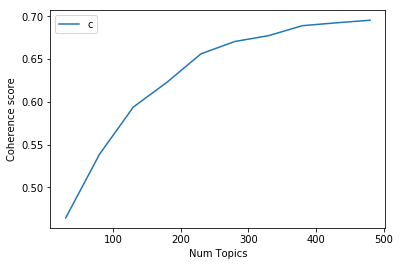

In [8]:
start=30
limit=500
step=50
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [9]:
name = 'best_model'
path = os.path.join('../../feature_groups/lda_pickles', name)
with open(path, "wb") as f:
	_pickle.dump(best_model, f)

In [11]:

name = 'best_model'
path = os.path.join('../../feature_groups/lda_pickles', name)
with open(path, "rb") as f:
	test_model = _pickle.load(f)

In [ ]:
Dominant topic per tweet(tweet)

In [16]:
dominant_topic = lda.domininant_topic(best_model)
dominant_topic

,Dominant_Topic,Perc_Contribution,Topic_Keywords,0
0,146.0,0.0713,"egypt, libya, revolution, tunisia, feb, arab, ...",tunisia egypt bahrain libya courage is conta...
1,317.0,0.0160,"godfinger, hit_level, crap, capital, ambition,...",i just earned the 'rumble in the jungle' award...
2,258.0,0.0084,"kid, live, break, feel, week, note, consegui, ...",about to head to the airport soon \n
3,226.0,0.0394,"win, giveaway, follow, enter, contest, chance,...",enter to win a bar of handmade 100% vegan soap...
4,192.0,0.0114,"world, today, bed, wikileak, ticket, trading, ...",i know i'm late and all i'm just getting back ...
5,122.0,0.0098,"start, city, la, total, moment, dead, executiv...",starting on wednesday 915 is hosting a twitter...
6,339.0,0.0104,"school, day, pana, selection, hurt, vegas, wik...",at this crazy time i'm at school already x\n
7,79.0,0.0168,"dontjudgeme, lol, lmao, wanna, random, lil, te...",question if sum1 u use to talk to says they ...
8,462.0,0.0142,"show, twitter, rescue, llegado, hayooo, angel,...",news carrefour menggeser pasar tradisionil col...
9,382.0,0.0084,"ill, head, sherry, massacre, donnell, rain, ja...",thankful for everything because without it i d...


Find the most representative document each topic

In [20]:
representative_doc = lda.get_representative_docs(best_model)
representative_doc

representative docs


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.0767,"election, call, sad, reid, harry, har, launch,...",jeg kan ikke forstÃ£Â¥ jeg har smadret den and...
1,1.0,0.0376,"love, miss, show, year, tidur, shut, waffle, t...",i would like to thanks for having the waffle h...
2,2.0,0.0988,"lo, a³, los, history, wikileak, speech, mis, g...",the history of los pandos the history of wine ...
3,3.0,0.0191,"deal, political, dontjudgeme, break, hot, teap...",a raw deal \n
4,4.0,0.0472,"cook, morning, november, money, walk, call, fr...",good morning folkzdon't know what 2 do this mo...
5,5.0,0.0233,"stuff, cost, android, tomorrow, canadian, kick...",woofryt nw im new in twitternd itseems imback ...
6,6.0,0.0673,"healthcare, health, reform, system, fight, sol...",amelia arenas translates hippocrates' oath in ...
7,7.0,0.1033,"home, info, para, pagi, diem, sekali, addict, ...",apria healthcare home infusion nurse l per die...
8,8.0,0.0173,"harrypotter, haiti, lol, daily, politic, box, ...",indonesia adalah negeri yang paling unik diman...
9,9.0,0.1092,"news, friend, earthquake, story, share, stay, ...",share with friends health Ã¢ÂÂ vitamins new...


 Topic distribution across documents

In [22]:
topic_dist_doc =  lda.topic_distribution(best_model)
topic_dist_doc

topic distribution


,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,146.0,"egypt, libya, revolution, tunisia, feb, arab, ...",239.0,0.0239
1,317.0,"godfinger, hit_level, crap, capital, ambition,...",12.0,0.0012
2,258.0,"kid, live, break, feel, week, note, consegui, ...",25.0,0.0025
3,226.0,"win, giveaway, follow, enter, contest, chance,...",10.0,0.0010
4,192.0,"world, today, bed, wikileak, ticket, trading, ...",11.0,0.0011
5,122.0,"start, city, la, total, moment, dead, executiv...",12.0,0.0012
6,339.0,"school, day, pana, selection, hurt, vegas, wik...",80.0,0.0080
7,79.0,"dontjudgeme, lol, lmao, wanna, random, lil, te...",15.0,0.0015
8,462.0,"show, twitter, rescue, llegado, hayooo, angel,...",10.0,0.0010
9,382.0,"ill, head, sherry, massacre, donnell, rain, ja...",36.0,0.0036


show_topics

In [30]:
model_topics = best_model.show_topics(formatted=False)
pprint(best_model.print_topics(num_topics=480, num_words=50))

[(0,
  '0.082*"election" + 0.067*"call" + 0.037*"sad" + 0.037*"reid" + 0.030*"har" '
  '+ 0.030*"harry" + 0.022*"launch" + 0.015*"asset" + 0.015*"apalagi" + '
  '0.015*"yesterday" + 0.015*"fraud" + 0.015*"kan" + 0.015*"takut" + '
  '0.015*"flipout" + 0.015*"pain" + 0.015*"serve" + 0.007*"prolife" + '
  '0.007*"morningit" + 0.007*"ham" + 0.007*"masi" + 0.007*"amanha" + '
  '0.007*"issue" + 0.007*"mousa" + 0.007*"tamba" + 0.007*"virus" + 0.007*"sjk" '
  '+ 0.007*"cuba" + 0.007*"hear" + 0.007*"parpol" + 0.007*"manifest" + '
  '0.007*"review" + 0.007*"fiiiinnnnnn" + 0.007*"rumor" + 0.007*"evil" + '
  '0.007*"anywayenjoy" + 0.007*"mary" + 0.007*"rond" + 0.007*"evo" + '
  '0.007*"eentje" + 0.007*"funding" + 0.007*"change" + 0.007*"mijn" + '
  '0.007*"quebec" + 0.007*"lagunya" + 0.007*"schi" + 0.007*"defeat" + '
  '0.007*"grandpa" + 0.007*"counterfeit" + 0.007*"personi" + 0.007*"reside"'),
 (1,
  '0.104*"love" + 0.081*"miss" + 0.074*"show" + 0.074*"year" + 0.030*"tidur" + '
  '0.022*"waffle" 

 (101,
  '0.099*"question" + 0.022*"huhu" + 0.022*"scene" + 0.022*"meet" + '
  '0.022*"voting" + 0.022*"clinton" + 0.011*"goodmorn" + 0.011*"moist" + '
  '0.011*"frustrating" + 0.011*"thankful" + 0.011*"mai" + 0.011*"omar" + '
  '0.011*"peso" + 0.011*"supply" + 0.011*"ultimately" + 0.011*"lgbt" + '
  '0.011*"bole" + 0.011*"tweetsnya" + 0.011*"egift" + 0.011*"nonconsensual" + '
  '0.011*"evidence" + 0.011*"startup" + 0.011*"lady" + 0.011*"resto" + '
  '0.011*"blg" + 0.011*"president" + 0.011*"occur" + 0.011*"placar" + '
  '0.011*"wave" + 0.011*"curse" + 0.011*"dictator" + 0.011*"tootkay" + '
  '0.011*"strategy" + 0.011*"bike" + 0.011*"drakeshand" + 0.011*"cheap" + '
  '0.011*"bloomberg" + 0.011*"elerian" + 0.011*"freedomwalk" + 0.011*"compar" '
  '+ 0.011*"aos" + 0.011*"pannepot" + 0.011*"strip" + 0.011*"qatar" + '
  '0.011*"useless" + 0.011*"kom" + 0.011*"breaking" + 0.011*"interview" + '
  '0.011*"referendum" + 0.011*"dose"'),
 (102,
  '0.052*"heart" + 0.052*"pass" + 0.031*"call" + 0.

  '0.056*"year" + 0.047*"cancer" + 0.037*"user" + 0.037*"news" + 0.028*"pour" '
  '+ 0.019*"health" + 0.019*"disturb" + 0.019*"kangen" + 0.019*"great" + '
  '0.019*"feature" + 0.019*"greenpeace" + 0.009*"noodle" + 0.009*"leak" + '
  '0.009*"heel" + 0.009*"jajajaja" + 0.009*"geek" + 0.009*"tom" + '
  '0.009*"revolution" + 0.009*"oke" + 0.009*"nostaligia" + 0.009*"kalah" + '
  '0.009*"li" + 0.009*"arrrghh" + 0.009*"metrt" + 0.009*"maunya" + '
  '0.009*"microsoft" + 0.009*"shakira" + 0.009*"oreimo" + '
  '0.009*"fairtrademonth" + 0.009*"global_war" + 0.009*"sense" + 0.009*"a¼" + '
  '0.009*"boy" + 0.009*"surprised" + 0.009*"day" + 0.009*"chianti" + '
  '0.009*"tampilan" + 0.009*"gop" + 0.009*"opinion" + 0.009*"wild" + '
  '0.009*"scramble" + 0.009*"cusummit" + 0.009*"sao" + 0.009*"suud" + '
  '0.009*"orchestra" + 0.009*"noam" + 0.009*"giri" + 0.009*"prezzie" + '
  '0.009*"giving_away" + 0.009*"designer"'),
 (168,
  '0.120*"friday" + 0.088*"fall" + 0.064*"drive" + 0.040*"world" + '
  '0.03

  '0.007*"dmakan" + 0.007*"estimate" + 0.007*"presso" + 0.007*"special" + '
  '0.007*"presente" + 0.007*"ymi" + 0.007*"agustus" + 0.007*"aminn" + '
  '0.007*"psti" + 0.007*"case" + 0.007*"horee" + 0.007*"ngambek" + '
  '0.007*"follower" + 0.007*"communist" + 0.007*"cry" + 0.007*"slow" + '
  '0.007*"check" + 0.007*"enemy" + 0.007*"fuck" + 0.007*"amendment" + '
  '0.007*"cuma" + 0.007*"naik" + 0.007*"video" + 0.007*"complete" + '
  '0.007*"warner" + 0.007*"rusak" + 0.007*"duro" + 0.007*"tcot_tlot" + '
  '0.007*"kenanganku" + 0.007*"wi"'),
 (233,
  '0.102*"guy" + 0.078*"god" + 0.062*"heart" + 0.047*"omg" + 0.039*"basic" + '
  '0.031*"great" + 0.023*"trial" + 0.023*"si" + 0.023*"rant" + 0.023*"baja" + '
  '0.016*"algo" + 0.016*"french" + 0.016*"treason" + 0.016*"voter" + '
  '0.016*"wash" + 0.016*"group" + 0.008*"restaurant" + 0.008*"dulu" + '
  '0.008*"hath" + 0.008*"randslide" + 0.008*"snub" + 0.008*"zeta" + '
  '0.008*"duanya" + 0.008*"chancea" + 0.008*"transportation" + 0.008*"kemana" 

  '0.009*"lb" + 0.009*"por" + 0.009*"drunken" + 0.009*"dey" + '
  '0.009*"mastercheflive" + 0.009*"weekimma" + 0.009*"violent" + '
  '0.009*"distraction" + 0.009*"nda" + 0.009*"mcryg" + 0.009*"assembly" + '
  '0.009*"mute" + 0.009*"kerja" + 0.009*"mayor" + 0.009*"negative" + '
  '0.009*"correspondent" + 0.009*"mejor" + 0.009*"happysap" + 0.009*"reino" + '
  '0.009*"vid" + 0.009*"online" + 0.009*"place" + 0.009*"ver" + '
  '0.009*"unusual" + 0.009*"acceptable"'),
 (266,
  '0.203*"egypt" + 0.120*"complete" + 0.068*"uninstalling_dictator" + '
  '0.053*"american" + 0.023*"mubarakgone" + 0.023*"st" + 0.015*"congrat" + '
  '0.015*"write" + 0.015*"gay" + 0.008*"badan" + 0.008*"gua" + 0.008*"crow" + '
  '0.008*"twitterart" + 0.008*"coke" + 0.008*"gatau" + 0.008*"phoenix" + '
  '0.008*"imitation" + 0.008*"wound" + 0.008*"abandon" + 0.008*"syrah" + '
  '0.008*"gumbee" + 0.008*"ciume" + 0.008*"rinkasihan" + 0.008*"correct" + '
  '0.008*"judge" + 0.008*"prime" + 0.008*"west" + 0.008*"killsb_killsb

  '0.162*"make" + 0.095*"love" + 0.038*"para" + 0.038*"would_like" + '
  '0.029*"oil" + 0.029*"camp" + 0.019*"kim" + 0.019*"confirm" + 0.019*"lak" + '
  '0.019*"bless" + 0.019*"ahead" + 0.010*"sis" + 0.010*"beauty" + 0.010*"yaak" '
  '+ 0.010*"stupid" + 0.010*"ltltltlt" + 0.010*"meanie" + 0.010*"toscana" + '
  '0.010*"screw" + 0.010*"beb" + 0.010*"ti" + 0.010*"nigga" + '
  '0.010*"benerbener" + 0.010*"montana" + 0.010*"post" + 0.010*"yu" + '
  '0.010*"samaaa" + 0.010*"disappointment" + 0.010*"pensar" + '
  '0.010*"frigerator" + 0.010*"lastword" + 0.010*"disparado" + '
  '0.010*"soconnect" + 0.010*"ce" + 0.010*"true" + 0.010*"theme" + '
  '0.010*"kipas" + 0.010*"estragado" + 0.010*"chew" + 0.010*"sekitar" + '
  '0.010*"trayectoria" + 0.010*"toda" + 0.010*"laporan" + 0.010*"tnt" + '
  '0.010*"opii" + 0.010*"curfew" + 0.010*"supporter" + 0.010*"virginia" + '
  '0.010*"vmware" + 0.010*"walmart"'),
 (299,
  '0.037*"pirate" + 0.037*"sad" + 0.025*"hukum" + 0.025*"move" + 0.025*"pulsa" '
  '+ 

  '0.009*"skim" + 0.009*"accent" + 0.009*"cower" + 0.009*"naacp" + '
  '0.009*"crisis" + 0.009*"irei" + 0.009*"kou" + 0.009*"pillow" + 0.009*"wife" '
  '+ 0.009*"jame" + 0.009*"bureaus" + 0.009*"saxum" + 0.009*"detroit" + '
  '0.009*"shirt" + 0.009*"mistake" + 0.009*"pingin"'),
 (331,
  '0.222*"twitter" + 0.218*"wikileak" + 0.074*"cablegate" + 0.056*"trend" + '
  '0.028*"topic" + 0.023*"justice" + 0.023*"demi" + 0.019*"subpoena" + '
  '0.014*"public" + 0.009*"ne" + 0.009*"set" + 0.009*"sleazy" + '
  '0.009*"strategy" + 0.009*"wtf" + 0.009*"dontjudgeme" + 0.005*"ojala" + '
  '0.005*"indonesian" + 0.005*"logo" + 0.005*"mussel" + 0.005*"nurture" + '
  '0.005*"dsini" + 0.005*"handle" + 0.005*"tiap" + 0.005*"pin" + '
  '0.005*"croissant" + 0.005*"kid" + 0.005*"soccer" + 0.005*"sdwm" + '
  '0.005*"killing" + 0.005*"landon" + 0.005*"effort" + 0.005*"spot" + '
  '0.005*"menteri" + 0.005*"walter" + 0.005*"prop" + 0.005*"cocktail" + '
  '0.005*"foi" + 0.005*"hotel" + 0.005*"smha" + 0.005*"headgo

  '0.019*"obama" + 0.019*"deficit" + 0.012*"put" + 0.009*"gop" + '
  '0.009*"funding" + 0.009*"amendment" + 0.006*"payer" + 0.006*"answer" + '
  '0.006*"leader" + 0.003*"gregg" + 0.003*"dollar" + 0.003*"saturday" + '
  '0.003*"bbl" + 0.003*"drmh" + 0.003*"anniversary" + 0.003*"jgn" + '
  '0.003*"quit" + 0.003*"tanah" + 0.003*"wofa" + 0.003*"society" + '
  '0.003*"hear" + 0.003*"feelin" + 0.003*"sookie" + 0.003*"alliteration" + '
  '0.003*"automobile" + 0.003*"sue" + 0.003*"kulka" + 0.003*"lease" + '
  '0.003*"whistleblower" + 0.003*"mitch" + 0.003*"prayforbisbal" + '
  '0.003*"church" + 0.003*"diffrent" + 0.003*"ngeliat" + 0.003*"venezuela" + '
  '0.003*"scenario" + 0.003*"cand" + 0.003*"coworker"'),
 (364,
  '0.242*"wikileak" + 0.073*"watch" + 0.065*"turn" + 0.056*"video" + '
  '0.032*"people" + 0.024*"smart" + 0.016*"mensyen" + 0.016*"huge" + '
  '0.016*"hell" + 0.008*"block" + 0.008*"authority" + 0.008*"doc" + '
  '0.008*"southwest" + 0.008*"clear" + 0.008*"flagdrap" + 0.008*"xingar

  '0.096*"monday" + 0.048*"business" + 0.040*"cont" + 0.032*"worth" + '
  '0.032*"film" + 0.024*"cole" + 0.024*"exam" + 0.016*"macet" + 0.016*"family" '
  '+ 0.016*"ita" + 0.016*"disaster" + 0.016*"dunia" + 0.008*"desire" + '
  '0.008*"lead" + 0.008*"send" + 0.008*"signing" + 0.008*"naess" + '
  '0.008*"mene" + 0.008*"gusanero" + 0.008*"therea" + 0.008*"maddow" + '
  '0.008*"altoarizona" + 0.008*"yay" + 0.008*"invest" + 0.008*"texas" + '
  '0.008*"muni" + 0.008*"prize_pack" + 0.008*"hahah" + 0.008*"flannery" + '
  '0.008*"complete" + 0.008*"gla" + 0.008*"human" + 0.008*"personal" + '
  '0.008*"congressional" + 0.008*"block" + 0.008*"priceless" + 0.008*"front" + '
  '0.008*"mynewsin" + 0.008*"cekaleee" + 0.008*"guardian" + 0.008*"aktiv" + '
  '0.008*"die" + 0.008*"sponsor" + 0.008*"tulungagung" + 0.008*"teimei" + '
  '0.008*"pracinha" + 0.008*"court" + 0.008*"cartridge" + 0.008*"blitz" + '
  '0.008*"quasipublic"'),
 (397,
  '0.060*"grow" + 0.052*"awesome" + 0.043*"hungry" + 0.034*"minut

  '0.010*"water" + 0.010*"tni" + 0.010*"bin" + 0.010*"siu" + 0.010*"bueno"'),
 (429,
  '0.072*"face" + 0.063*"love" + 0.045*"bgt" + 0.045*"basic" + 0.036*"green" + '
  '0.027*"real" + 0.027*"indonesia" + 0.027*"cameron" + 0.027*"free" + '
  '0.018*"lose" + 0.018*"suck" + 0.018*"sono" + 0.018*"impossible" + '
  '0.018*"world" + 0.018*"france" + 0.009*"vocab" + 0.009*"ilovejesus" + '
  '0.009*"futsal" + 0.009*"widely" + 0.009*"arabiya" + 0.009*"bridesmaid" + '
  '0.009*"haircutdebut" + 0.009*"hamxawy" + 0.009*"nunca" + 0.009*"actor" + '
  '0.009*"kword" + 0.009*"chain" + 0.009*"demsa" + 0.009*"syfy" + '
  '0.009*"americanidol" + 0.009*"moment" + 0.009*"distance" + 0.009*"math" + '
  '0.009*"kalian" + 0.009*"pick" + 0.009*"verizon" + 0.009*"foreign" + '
  '0.009*"haitif" + 0.009*"touc" + 0.009*"tent" + 0.009*"pekso" + 0.009*"mada" '
  '+ 0.009*"tao" + 0.009*"leuk" + 0.009*"handed" + 0.009*"bowe" + '
  '0.009*"empty" + 0.009*"freeman" + 0.009*"close" + 0.009*"grammar"'),
 (430,
  '0.138*"d

  '0.010*"eesh" + 0.010*"saudade" + 0.010*"aromatic" + 0.010*"rap" + '
  '0.010*"gugur" + 0.010*"intertwine"'),
 (462,
  '0.078*"show" + 0.033*"rescue" + 0.033*"twitter" + 0.022*"llegado" + '
  '0.022*"hayooo" + 0.022*"christma" + 0.022*"angel" + 0.011*"lngsung" + '
  '0.011*"voca_aª" + 0.011*"intuitive" + 0.011*"water" + 0.011*"personal" + '
  '0.011*"jarang" + 0.011*"azz" + 0.011*"kkkkkkkkk" + 0.011*"tewa" + '
  '0.011*"macbook" + 0.011*"bizarro" + 0.011*"yang" + 0.011*"disagree" + '
  '0.011*"nad" + 0.011*"spinoff" + 0.011*"nunca" + 0.011*"bout" + 0.011*"arah" '
  '+ 0.011*"puyuh" + 0.011*"multistate" + 0.011*"ohhh" + 0.011*"pasar" + '
  '0.011*"classmate" + 0.011*"corkonian" + 0.011*"wbreeze" + 0.011*"country" + '
  '0.011*"kurakura" + 0.011*"humanity" + 0.011*"export" + 0.011*"oath" + '
  '0.011*"usable" + 0.011*"silly" + 0.011*"kne" + 0.011*"enraged" + '
  '0.011*"negotiate" + 0.011*"bottle" + 0.011*"mess" + 0.011*"pekingese" + '
  '0.011*"coppola" + 0.011*"kkzooi" + 0.011*"charg